In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('Rainfall_Pune(2009-2019).csv')
df.head()

,Date,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,RainToday,RainNextday
0,1/1/2009,31,13,7.166667,0.625000,37.125000,1012.875000,10.0,4.500000,0.0,0,0
1,1/2/2009,30,15,9.250000,3.833333,45.000000,1013.625000,10.0,5.458333,0.0,0,0
2,1/3/2009,30,15,10.208333,4.041667,48.625000,1014.833333,10.0,3.750000,0.0,0,0
3,1/4/2009,31,14,11.250000,5.291667,51.875000,1013.625000,10.0,2.583333,0.0,0,0
4,1/5/2009,30,15,11.208333,8.416667,51.208333,1011.750000,10.0,4.791667,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4018 non-null   object 
 1   maxtempC       4018 non-null   int64  
 2   mintempC       4018 non-null   int64  
 3   DewPointC      4018 non-null   float64
 4   cloudcover     4018 non-null   float64
 5   humidity       4018 non-null   float64
 6   pressure       4018 non-null   float64
 7   visibility     4018 non-null   float64
 8   windspeedKmph  4018 non-null   float64
 9   precipMM       4018 non-null   float64
 10  RainToday      4018 non-null   int64  
 11  RainNextday    4018 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 376.8+ KB


In [4]:
df['Date']  = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4018 non-null   datetime64[ns]
 1   maxtempC       4018 non-null   int64         
 2   mintempC       4018 non-null   int64         
 3   DewPointC      4018 non-null   float64       
 4   cloudcover     4018 non-null   float64       
 5   humidity       4018 non-null   float64       
 6   pressure       4018 non-null   float64       
 7   visibility     4018 non-null   float64       
 8   windspeedKmph  4018 non-null   float64       
 9   precipMM       4018 non-null   float64       
 10  RainToday      4018 non-null   int64         
 11  RainNextday    4018 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 376.8 KB


In [6]:
df['date_month'] = df['Date'].dt.month

In [7]:
df['date_day'] = df['Date'].dt.day

In [8]:
df

,Date,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,RainToday,RainNextday,date_month,date_day
0,2009-01-01,31,13,7.166667,0.625000,37.125000,1012.875000,10.000000,4.500000,0.000000,0,0,1,1
1,2009-01-02,30,15,9.250000,3.833333,45.000000,1013.625000,10.000000,5.458333,0.000000,0,0,1,2
2,2009-01-03,30,15,10.208333,4.041667,48.625000,1014.833333,10.000000,3.750000,0.000000,0,0,1,3
3,2009-01-04,31,14,11.250000,5.291667,51.875000,1013.625000,10.000000,2.583333,0.000000,0,0,1,4
4,2009-01-05,30,15,11.208333,8.416667,51.208333,1011.750000,10.000000,4.791667,0.000000,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2019-12-28,26,18,15.750000,35.541667,71.958333,1012.250000,10.000000,11.708333,0.000000,0,1,12,28
4014,2019-12-29,28,17,15.125000,47.833333,65.291667,1012.958333,9.916667,7.125000,0.016667,1,0,12,29
4015,2019-12-30,29,18,15.833333,6.541667,68.250000,1012.083333,10.000000,8.166667,0.000000,0,0,12,30
4016,2019-12-31,29,18,11.666667,2.125000,57.583333,1013.166667,10.000000,7.791667,0.000000,0,0,12,31


<Axes: ylabel='count'>

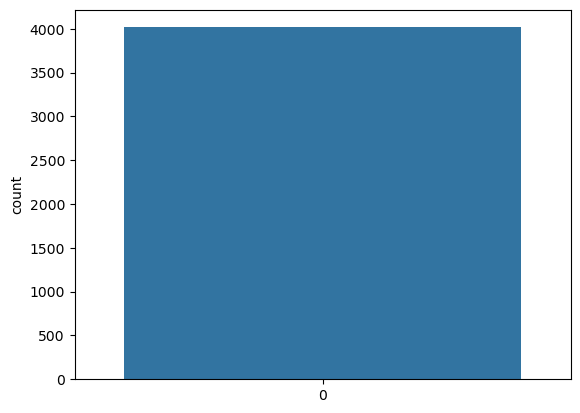

In [12]:
sns.countplot(df['RainNextday'])


In [13]:
df.columns

Index(['Date', 'maxtempC', 'mintempC', 'DewPointC', 'cloudcover', 'humidity',
       'pressure', 'visibility', 'windspeedKmph', 'precipMM', 'RainToday',
       'RainNextday', 'date_month', 'date_day'],
      dtype='object')

<Axes: >

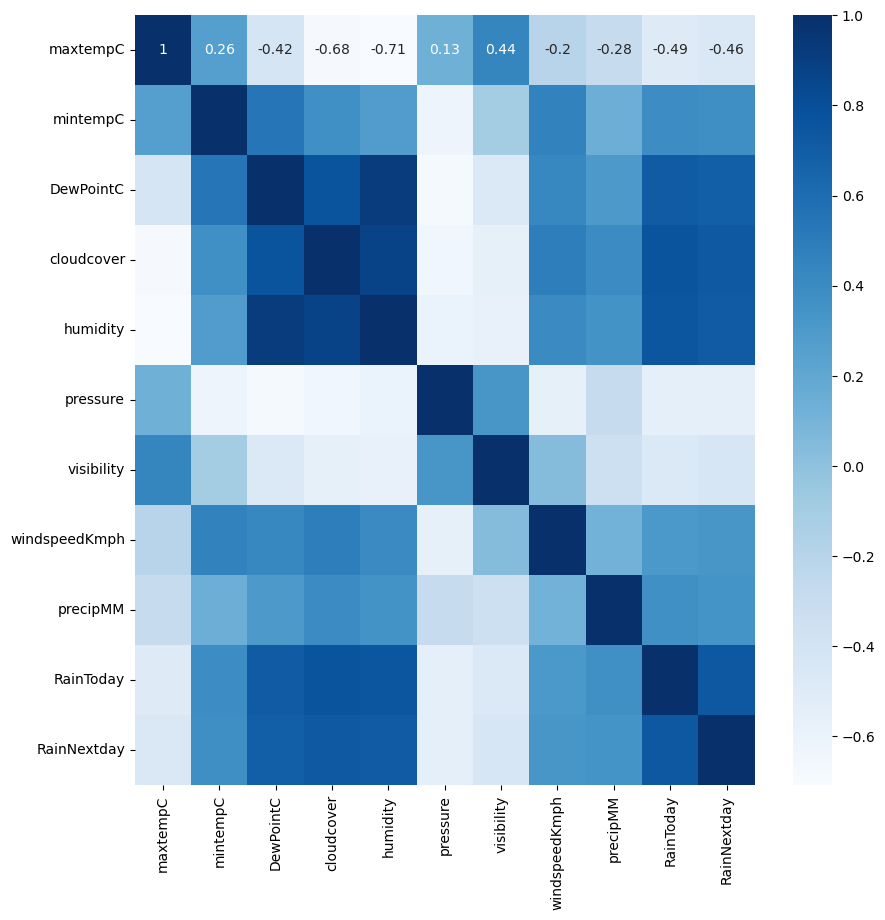

In [14]:
temp = df.drop(columns=['Date','date_month','date_day'])
co = temp.corr()
plt.figure(figsize=(10,10))
sns.heatmap(co,annot=True,cmap="Blues")

In [15]:
temp.corr()

,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,RainToday,RainNextday
maxtempC,1.000000,0.263167,-0.418358,-0.684125,-0.708408,0.130550,0.443397,-0.198271,-0.281551,-0.490870,-0.460077
mintempC,0.263167,1.000000,0.543236,0.368997,0.285449,-0.615858,-0.100158,0.461053,0.142186,0.387592,0.373784
DewPointC,-0.418358,0.543236,1.000000,0.762046,0.918002,-0.676934,-0.461515,0.429441,0.302873,0.714416,0.687547
cloudcover,-0.684125,0.368997,0.762046,1.000000,0.877699,-0.646755,-0.558035,0.492523,0.393193,0.761288,0.731656
humidity,-0.708408,0.285449,0.918002,0.877699,1.000000,-0.592649,-0.577671,0.402115,0.352017,0.749593,0.717714
pressure,0.130550,-0.615858,-0.676934,-0.646755,-0.592649,1.000000,0.329026,-0.560079,-0.285396,-0.542491,-0.547469
visibility,0.443397,-0.100158,-0.461515,-0.558035,-0.577671,0.329026,1.000000,0.036228,-0.342677,-0.462247,-0.432964
windspeedKmph,-0.198271,0.461053,0.429441,0.492523,0.402115,-0.560079,0.036228,1.000000,0.116091,0.311978,0.326021
precipMM,-0.281551,0.142186,0.302873,0.393193,0.352017,-0.285396,-0.342677,0.116091,1.000000,0.366346,0.343111
RainToday,-0.490870,0.387592,0.714416,0.761288,0.749593,-0.542491,-0.462247,0.311978,0.366346,1.000000,0.738761


In [31]:
mean_of_rows = df[['mintempC', 'maxtempC']].mean(axis=1)

In [33]:
df['tempC'] = mean_of_rows

In [35]:
df.drop(columns=['mintempC','maxtempC','meanTemp'],axis=1,inplace=True)

In [37]:
df.shape

(4018, 13)

In [38]:
df

,Date,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,RainToday,RainNextday,date_month,date_day,tempC
0,2009-01-01,7.166667,0.625000,37.125000,1012.875000,10.000000,4.500000,0.000000,0,0,1,1,22.0
1,2009-01-02,9.250000,3.833333,45.000000,1013.625000,10.000000,5.458333,0.000000,0,0,1,2,22.5
2,2009-01-03,10.208333,4.041667,48.625000,1014.833333,10.000000,3.750000,0.000000,0,0,1,3,22.5
3,2009-01-04,11.250000,5.291667,51.875000,1013.625000,10.000000,2.583333,0.000000,0,0,1,4,22.5
4,2009-01-05,11.208333,8.416667,51.208333,1011.750000,10.000000,4.791667,0.000000,0,0,1,5,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2019-12-28,15.750000,35.541667,71.958333,1012.250000,10.000000,11.708333,0.000000,0,1,12,28,22.0
4014,2019-12-29,15.125000,47.833333,65.291667,1012.958333,9.916667,7.125000,0.016667,1,0,12,29,22.5
4015,2019-12-30,15.833333,6.541667,68.250000,1012.083333,10.000000,8.166667,0.000000,0,0,12,30,23.5
4016,2019-12-31,11.666667,2.125000,57.583333,1013.166667,10.000000,7.791667,0.000000,0,0,12,31,23.5


In [49]:
x.to_csv('Input Data')

In [18]:
a = df['cloudcover']
b = df['visibility']

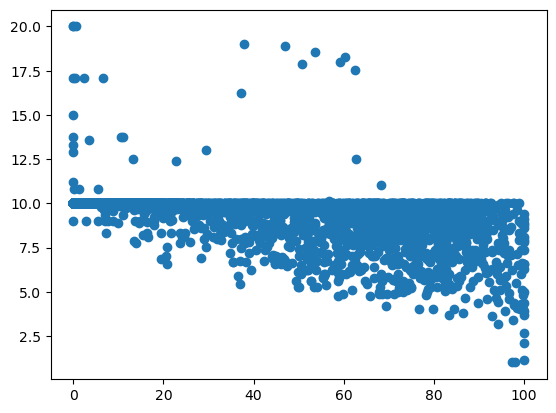

In [23]:
plt.scatter(a,b)
plt.show()

In [41]:
x = df.drop(["RainNextday","Date","windspeedKmph",'DewPointC','visibility','precipMM','cloudcover'],axis=1)
y = df["RainNextday"]

In [ ]:
P = x.drop(["date_month","date_day"],axis=1)
P

In [43]:
print(np.array(x))
print(np.array(y))

[[3.71250000e+01 1.01287500e+03 0.00000000e+00 1.00000000e+00
  1.00000000e+00 2.20000000e+01]
 [4.50000000e+01 1.01362500e+03 0.00000000e+00 1.00000000e+00
  2.00000000e+00 2.25000000e+01]
 [4.86250000e+01 1.01483333e+03 0.00000000e+00 1.00000000e+00
  3.00000000e+00 2.25000000e+01]
 ...
 [6.82500000e+01 1.01208333e+03 0.00000000e+00 1.20000000e+01
  3.00000000e+01 2.35000000e+01]
 [5.75833333e+01 1.01316667e+03 0.00000000e+00 1.20000000e+01
  3.10000000e+01 2.35000000e+01]
 [4.72083333e+01 1.01358333e+03 0.00000000e+00 1.00000000e+00
  1.00000000e+00 2.35000000e+01]]
[0 0 0 ... 0 0 0]


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [46]:
print(x.shape,x_train.shape,x_test.shape)

(4018, 6) (3214, 6) (804, 6)


In [47]:
model = XGBClassifier()

model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.8706467661691543
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       484
           1       0.83      0.85      0.84       320

    accuracy                           0.87       804
   macro avg       0.86      0.87      0.87       804
weighted avg       0.87      0.87      0.87       804



In [55]:
input_data = (4.72083333e+01, 1.01358333e+03, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.35000000e+01)
arr = np.asarray(input_data)
input_reshaped = np.reshape(input_data, (1, -1))

outcome = model.predict(input_reshaped)
if outcome==0:
    print("It will not rain tomorrow")
else:
    print("It will rain tomorrow")

It will not rain tomorrow


In [54]:
np.array(x.iloc[-1])

array([4.72083333e+01, 1.01358333e+03, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.35000000e+01])

In [56]:
y.iloc[-1]

0